# Setup

Run the following cell to install the necessary dependencies.

In [1]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 KB 6.9 MB/s eta 0:00:00a 0:00:01
  Using cached cloudpickle-3.0.0-py3-none-any.whl (20 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 40.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 56.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 32.0 MB/s eta 0:00:0000:0100:01
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


Run the following cell to import the necessary packages.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import shap
import xgboost

# Exploratory Data Analysis

Let's classify the sentiment (positive or negative) of movie reviews. For that, we will use the IMDB dataset, which contains 25,000 movie reviews from the Internet Movie Database (IMDB) and their sentiment labels. The dataset comes with the SHAP library.

In [8]:
X, y = shap.datasets.imdb()

Take a look at the dataset (X and y) to get a feeling for the data you are working with.

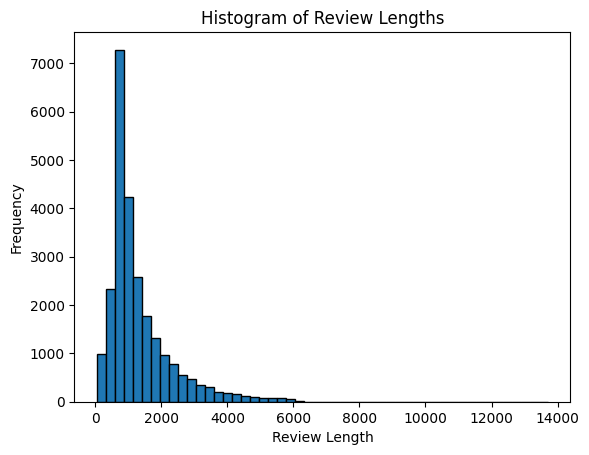

In [13]:
# TODO Conduct a simple exploratory data analysis (EDA), e.g.,
len(X)
# 1. Print the size of the dataset (i.e., number of movie reviews)
X[0]
# 2. Print one movie review
y
# 3. Print the labels
review_lengths = [len(review) for review in X]
plt.hist(review_lengths, bins=50, edgecolor='k')
plt.title('Histogram of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

# 4. Plot a histogram of the review lengths
# 5. ...

# Prepare Dataset

Split the data into a training and a test set. Use 20% of the examples for the test set.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Use TF-IDF representations to convert the text examples into a numeric word-count matrix.

In [15]:
vectorizer = TfidfVectorizer(stop_words='english', min_df=10, max_features=1000)
X_train_vec = vectorizer.fit_transform(X_train).toarray() # .toarray() transforms the sparse matrix into a dense matrix to avoid issues with shap later on
X_test_vec = vectorizer.transform(X_test).toarray()

# Print the dimensions of the resulting TF-IDF matrices
print("Training Set:", X_train_vec.shape)
print("Test Set:", X_test_vec.shape)

Training Set: (20000, 1000)
Test Set: (5000, 1000)


# SHAP for an XGBoost Model

Instantiate and fit an XGBClassifier model, i.e., a classifier based on decision trees.

In [20]:
model = xgboost.XGBClassifier()
model.fit(X_train_vec, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Calculate SHAP values using a shap.Explainer object. Then plot the SHAP values in a waterfall chart for a single movie review.

Starting point: https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/waterfall.html

In [21]:
# TODO Calculate SHAP values using a shap.Explainer object

# compute SHAP values
explainer = shap.Explainer(model, X_train_vec)
shap_values = explainer(X_test_vec)


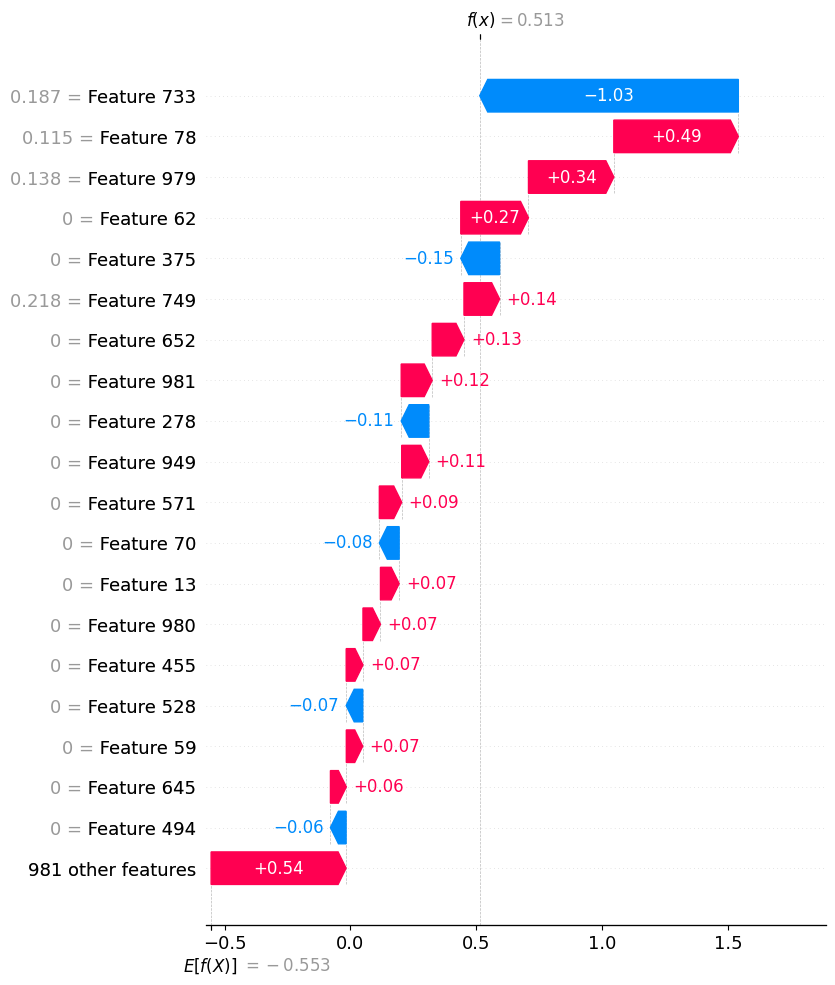

In [23]:
shap.plots.waterfall(shap_values[0], max_display=20)


Look at a particular movie review. Also print its ground truth label and predicted label.

In [24]:
index = 2

print("Review Text:\n", X_test[index])
print(f"Ground Truth: {'POSITIVE' if y_test[index] else 'NEGATIVE'}")
print(f"Model Prediction: {'POSITIVE' if model.predict([X_test_vec[index]])[0] == 1 else 'NEGATIVE'}")

Review Text:
 In the questionable comedy vein of Mel Brooks, "Wholly Moses!" tries to take the Bible story of Moses and make fun of it, resulting in the unfunniest Biblical spoof ever filmed.<br /><br />There is no real plot here, just excuses to trot out stalwart comedy talent in underwritten roles. Dudley Moore and Laraine Newman are on a bus tour of the Holy Land, when they stumble across an ancient scroll in a cave. There they read the story of Herschel and Zerelda, also played by Moore and Newman. Herschel's life parallels Moses'. He was sent down the river to be found by the pharaoh's family at the same time Moses was. Herschel's birth father, the late James Coco, becomes Herschel's slave after Herschel is rescued by idol makers and works as a sculptor. Eventually Herschel comes to work for the pharaoh as an astronomer, is banished, and ends up tending Moses' flock of sheep. Herschel and Moses are brothers in law, marrying sisters, and Herschel thinks God has chosen him to free h

In [34]:
# TODO Plot a waterfall chart for that movie review using shap.plots.waterfall(...) and the calculated SHAP values
# Plot a waterfall chart for the selected movie review using the previously calculated SHAP values
#shap.plots.waterfall(shap_values[index], max_display=20, show=True)
# Print names of features
print("Feature names:", model)


Feature names: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


# SHAP for a Transformer-based Model

Now, let's generate SHAP values for a Transformer-based sentiment classifier on the same dataset.

Starting point: https://shap.readthedocs.io/en/latest/example_notebooks/text_examples/sentiment_analysis/Positive%20vs.%20Negative%20Sentiment%20Classification.html

In [38]:
import transformers
import datasets


In [39]:
dataset = datasets.load_dataset("imdb", split="test")

# shorten the strings to fit into the pipeline model
short_data = [v[:500] for v in dataset["text"][:20]]


Generating unsupervised split: 100%|██████████| 50000/50000 [00:00<00:00, 309499.33 examples/s]


In [40]:
classifier = transformers.pipeline("sentiment-analysis", return_all_scores=True)
classifier(short_data[:2])

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[[{'label': 'NEGATIVE', 'score': 0.07581973820924759},
  {'label': 'POSITIVE', 'score': 0.924180269241333}],
 [{'label': 'NEGATIVE', 'score': 0.018342629075050354},
  {'label': 'POSITIVE', 'score': 0.9816573858261108}]]

In [41]:
# TODO Calculate SHAP values using a shap.Explainer object
explainer = shap.Explainer(classifier)
shap_values = explainer(short_data[:2])
shap.plots.text(shap_values[:, :, "POSITIVE"])


PartitionExplainer explainer: 3it [01:51, 55.89s/it]               


In [ ]:
# TODO Plot the SHAP values for a single moview review, e.g., using shap.plots.text(...) and the calculated SHAP values

# Practice Questions

1.   Why are LLMs sometimes bad at solving multi-step reasoning problems? In general, how can we improve the performance of LLM-based problem-solving approaches on multi-step reasoning problems?
- auto-regressive -> achieve local minimum and stay there, wrong multi step answer -> leads to wrong answer in the end
- we can use two calls for each step with different llms -> one generates the answer the other one checks the correctness and prompts first one if there is something wrong to change answer  
2.   What are the advantages and disadvantages of using inherently transparent models? In which situation does it make sense, in which situations not?
- easier to improve the model, because we can see why we get some results.
- where explainability is important -> financial domain, medical domain. Generation of images does not matter that much, you jsut want a neat image
3.   How can we make LLMs produce a chain of reasoning steps to solve a complex problem through prompting alone, i.e., without fine-tuning the model?
- "Think step by step:"
4.   How is Tree-of-Thoughts (ToT) different from Chain-of-Thought (CoT) and Input-Output/Standard Prompting (IO)? What kinds of problems can and cannot be solved with each technique?
- tree-of-though -> there is a tree of chain of thoughs, which can be traversed by typical algos
- cot -> model prints outs steps of reasoning
- io -> model just reacts to prompt
5.   When facing a knowledge-related problem or question that is difficult to understand, which LLM prompting technique can help in such cases?
- Personalization: You are Richard Feynman, great scientist ... . Explain to me the "_".
6.   When facing a clearly described problem or question where the correct answer is difficult to find, which LLM prompting technique can help in such cases?
- usually think step by step cot. Few shot is also helpful
7.  What is the probability-faithfulness dilemma in XAI and how can LLM prompting techniques help to avoid or reduce it?
- we let the model explain its reasoning to itself, 
- whether explanation looks reasonable to humans is not correletaed how model actually works
